In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [2]:
hours =  [2, 3, 4, 5, 6, 1.5, 5, 7, 8, 10]
money_earned = [50, 70, 90, 100, 110, 40, 110, 130, 145, 180]
call_center_df = pd.DataFrame({'hours':hours,'money_earned':money_earned})
call_center_df

,hours,money_earned
0,2.0,50
1,3.0,70
2,4.0,90
3,5.0,100
4,6.0,110
5,1.5,40
6,5.0,110
7,7.0,130
8,8.0,145
9,10.0,180


In [3]:
X = call_center_df.drop('money_earned',axis=1)
y = call_center_df.drop('hours',axis=1)
y

,money_earned
0,50
1,70
2,90
3,100
4,110
5,40
6,110
7,130
8,145
9,180


In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
train_rsme_errors = []
test_rsme_errors = []

for degree in range(1,7):
    poly_converter = PolynomialFeatures(degree=degree,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3,random_state=10)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_rsme = np.sqrt(mean_squared_error(y_train,train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_predictions))
    train_rsme_errors.append(train_rsme)
    test_rsme_errors.append(test_rmse)


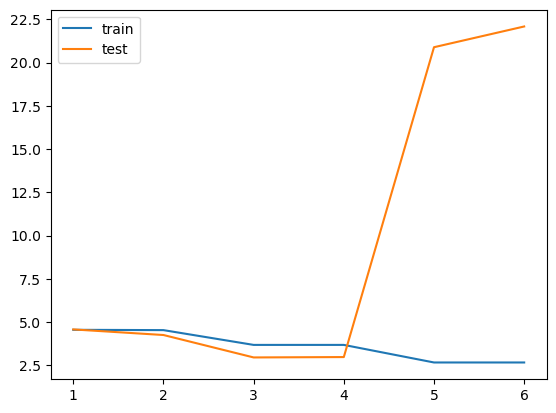

In [5]:
degrees = np.linspace(1,6,6)
plt.plot(degrees,train_rsme_errors,label='train')
plt.plot(degrees,test_rsme_errors,label='test')
plt.legend()
plt.show()

In [6]:
print(f"Train\n{train_rsme_errors}")
print(f"Test\n{test_rsme_errors}")

Train
[4.559886358318898, 4.541802849684084, 3.687882546301265, 3.687741332989108, 2.6726124191242437, 2.6726124191242437]
Test
[4.582487397553141, 4.259544425904053, 2.9635617756230497, 2.9854289147495217, 20.886914211777214, 22.085147465967623]


In [7]:
from sklearn.linear_model import Ridge
poly_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features = poly_converter.fit_transform(X)
ridge_model = Ridge(alpha=3)
ridge_model.fit(poly_features,y)
predictions =  ridge_model.predict(poly_features)

In [8]:
ridge_model.coef_

array([[ 3.36347738,  2.47686429, -0.14265962]])

In [10]:
from joblib import dump,load
poly_converter = PolynomialFeatures(degree=3,include_bias=False)
dump(poly_converter,'models/call_center_poly_converter')
dump(ridge_model,'models/poly_call_center_model')

loaded_converter = load('models/call_center_poly_converter')
loaded_model = load('models/poly_call_center_model')

new_data = pd.DataFrame({'hours':[5.5]})
poly_new_data = loaded_converter.fit_transform(new_data)
prediction = loaded_model.predict(poly_new_data)
prediction

array([[107.64069971]])